In [1]:
# We investigate the positions of corners throughout training
# tanh activation - tanh(w*x+b)
# Like in Relu, corner is defined as -b/w.

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# step 1: generate data #

seed = 5
np.random.seed(seed)
torch.manual_seed(seed)
# w: width of the teacher network
w = 5
# w2: width of the student network
w2 = 10

class Net(nn.Module):

    def __init__(self, w=1):
        super(Net, self).__init__()
        self.l1 = nn.Linear(1, w)
        self.l2 = nn.Linear(w, 1)

    def forward(self, x):
        #f = torch.nn.LeakyReLU(0.3)
        f = torch.nn.Tanh()
        self.x1 = f(self.l1(x))
        self.x2 = self.l2(self.x1)
        return self.x2
    
# teacher network
GT = Net(w=w)
num = 1001
x = torch.linspace(-10,10,steps=num).unsqueeze(dim=1)
label = GT(x).detach()
corners_gt = -GT.l1.bias/GT.l1.weight[:,0]

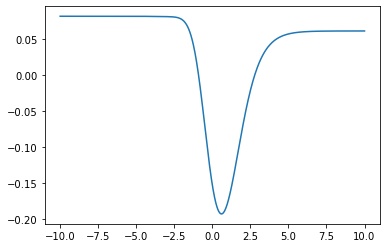

In [3]:
plt.plot(x.detach().numpy()[:,0], label.detach().numpy()[:,0])

In [4]:
# corners in teacher network
corners_gt

tensor([ 1.1608, -0.8976, -0.5839,  1.4589, -1.1763], grad_fn=<DivBackward0>)

In [5]:
# step2: training

seed = 3
np.random.seed(seed)
torch.manual_seed(seed)

model = Net(w=w2)

epochs = 10000
log = 1000

#optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
cornerss = []

for epoch in range(epochs):  # loop over the dataset multiple times

    optimizer.zero_grad()

    outputs = model(x)
    loss = torch.mean((outputs-label)**2)
    loss.backward()
    optimizer.step()
    corners = -model.l1.bias/model.l1.weight[:,0]
    cornerss.append(corners.detach().numpy())
    
    if epoch % log == 0:
        print("epoch: %d  | loss: %.8f"%(epoch, loss.detach().numpy()))
        
cornerss = np.array(cornerss)

epoch: 0  | loss: 0.05283320
epoch: 1000  | loss: 0.00002341
epoch: 2000  | loss: 0.00001360
epoch: 3000  | loss: 0.00001171
epoch: 4000  | loss: 0.00001027
epoch: 5000  | loss: 0.00000904
epoch: 6000  | loss: 0.00000798
epoch: 7000  | loss: 0.00000708
epoch: 8000  | loss: 0.00000632
epoch: 9000  | loss: 0.00000567


(-5.0, 5.0)

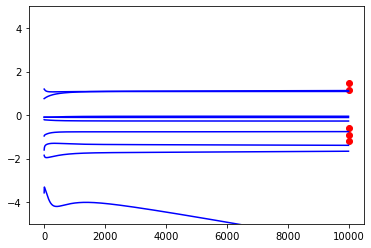

In [6]:

# blue lines: evolution of corners in training
for i in range(w2):
    plt.plot(np.arange(epochs), cornerss[:,i], color="blue")
    
# red dots: ground truth corners
for i in range(w):
    plt.scatter([epochs],[corners_gt[i].detach().numpy()], color="red")

plt.ylim(-5,5)